In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
ecom = pd.read_csv(r"C:\Users\dai.STUDENTSDC\Downloads\ecom_data_rfm.csv",index_col=1)
ecom

,Unnamed: 0,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment
CustomerID,,,,,,,,,,
12346,1,2,358,2.08,2,1,1,211,United Kingdom,Lost Lowest
12347,2,182,35,481.21,5,4,3,543,Iceland,Loyal Customers
12348,3,31,108,178.71,5,1,2,512,Finland,Potential Loyalist
12349,4,73,51,605.10,5,2,4,524,Italy,Recent High Spender
12350,5,17,343,65.30,2,1,1,211,Norway,Lost Lowest
...,...,...,...,...,...,...,...,...,...,...
18280,4376,10,310,47.65,2,1,1,211,United Kingdom,Lost Lowest
18281,4377,7,213,39.36,3,1,1,311,United Kingdom,About To Sleep
18282,4378,13,40,62.68,5,1,1,511,United Kingdom,New Customers


In [6]:
ecom = ecom[['Frequency','Recency','Monetary']]
ecom

,Frequency,Recency,Monetary
CustomerID,,,
12346,2,358,2.08
12347,182,35,481.21
12348,31,108,178.71
12349,73,51,605.10
12350,17,343,65.30
...,...,...,...
18280,10,310,47.65
18281,7,213,39.36
18282,13,40,62.68


In [10]:
scaler = StandardScaler().set_output(transform='pandas')
ecom_scaled = scaler.fit_transform(ecom)
ecom_scaled

,Frequency,Recency,Monetary
CustomerID,,,
12346,-0.392218,2.318901,-0.249443
12347,0.382791,-0.888861,0.123841
12348,-0.267356,-0.163887,-0.111833
12349,-0.086520,-0.729962,0.220362
12350,-0.327634,2.169934,-0.200190
...,...,...,...
18280,-0.357773,1.842206,-0.213940
18281,-0.370690,0.878884,-0.220399
18282,-0.344857,-0.839205,-0.202231


In [24]:
list =[]
for i in range(2,400):
    clust = MiniBatchKMeans(n_clusters=i,random_state=25)
    clust.fit(ecom_scaled)
    list.append([i,silhouette_score(ecom_scaled,clust.labels_)])

df_scores = pd.DataFrame(list,columns=['clusters','score'])
df_scores.sort_values('score',ascending=False)

,clusters,score
0,2,0.564924
2,4,0.484087
1,3,0.483703
3,5,0.452576
4,6,0.452004
...,...,...
298,300,0.248054
239,241,0.247816
337,339,0.246582
361,363,0.245721


<Axes: xlabel='clusters', ylabel='score'>

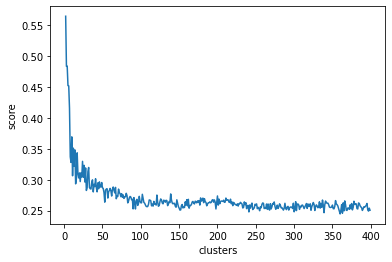

In [25]:
sns.lineplot(x=df_scores['clusters'],y=df_scores['score'])

In [12]:
clust = AgglomerativeClustering(n_clusters=2,linkage='average')
clust.fit(ecom_scaled)

AgglomerativeClustering(linkage='average')

In [13]:
df1 = ecom.copy()
df1['Cluster']=clust.labels_
df1.groupby('Cluster').mean()

,Frequency,Recency,Monetary
Cluster,,,
0,88.814485,124.563628,301.279868
1,6338.000000,35.000000,30923.390000
